In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

names = ['low', 'average', 'high']

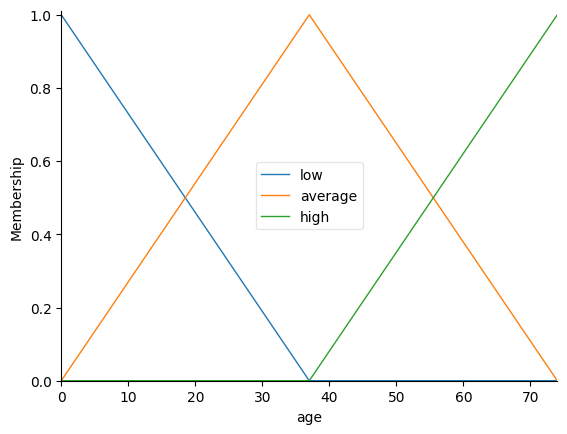

In [11]:
# FUSSIFICATION
MIN = 0; MAX = 75
age = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'age')
age.automf(3, names=names)
age.view()

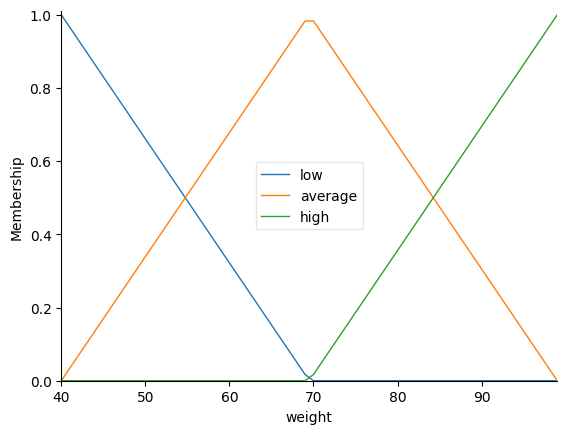

In [12]:
MIN = 40; MAX = 100
weight = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'weight')
weight.automf(3, names=names)
weight.view()

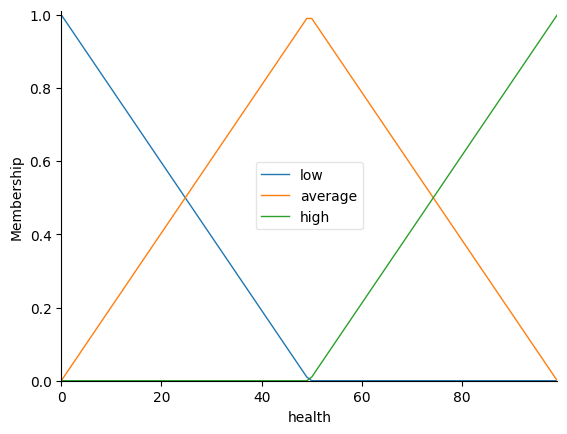

In [13]:
MIN = 0; MAX = 100
health = ctrl.Consequent(np.arange(MIN,MAX, 1), 'health')
health.automf(3, names=names)
health.view()

In [14]:
## FUZZY RULES
rule1 = ctrl.Rule(weight['average'], health['high'])
rule2 = ctrl.Rule(weight['low'] & age['high'], health['low'])
rule3 = ctrl.Rule(weight['high'], health['low'])
problem_ctrl  = ctrl.ControlSystem([rule1, rule2, rule3])
problem = ctrl.ControlSystemSimulation(problem_ctrl)

74.62861136742433


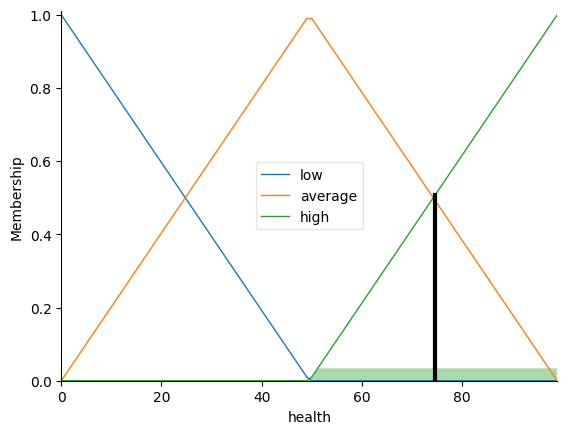

In [20]:
## APPLICATION
problem.input['age'] = 1
problem.input['weight'] = 41

problem.compute()

print(problem.output['health'])
health.view(sim=problem)